In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycaret.regression as pycReg

In [2]:
df = pd.read_csv('data/preprocessed.csv')

In [5]:
column_name = list(df.columns)
df.shape

(117, 39)

In [6]:
#setup model
model = pycReg.setup(data = df, 
                    target = 'target',
                    train_size=0.7,
                    normalize=True,
                    verbose=False,
                    numeric_features=list(df.drop(['target'], axis=1).columns),
                    silent = True)

In [7]:
# #compare models
# pycReg.compare_models(sort = "RMSE")

In [8]:
#create model
catB = pycReg.create_model('catboost', verbose=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6245,0.5424,0.7365,0.7928,-0,0.3221
1,0.6525,0.5777,0.7601,0.4223,-0,0.229
2,0.6323,0.5831,0.7636,0.6072,-0,0.3447
3,0.6077,0.6203,0.7876,-0.0179,-0,0.1967
4,0.9421,1.078,1.038,0.3842,-0,0.5215
5,0.796,0.7451,0.8632,0.5033,-0,0.5793
6,0.918,1.484,1.218,0.2019,-0,0.3523
7,0.5036,0.4017,0.6338,0.0818,-0,0.181
8,0.7348,0.8532,0.9237,0.2815,-0,0.4269
9,0.6262,0.7765,0.8812,0.5175,-0,0.4645


In [30]:
# #tune model
# catB = pycReg.tune_model(catB, optimize = "RMSE", n_iter = 500)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6092,0.7782,0.8822,0.4997,-0,0.2225
1,0.5879,0.9022,0.9499,0.5343,-0,0.3182
2,0.8397,0.9176,0.9579,0.4299,-0,0.5164
3,0.4056,0.2354,0.4852,0.8537,-0,0.272
4,0.6993,0.6825,0.8261,0.61,-0,0.3929
5,0.4707,0.461,0.6789,0.6793,-0,0.1679
6,0.3187,0.1502,0.3876,0.8646,-0,0.2186
7,0.4448,0.3127,0.5592,0.2852,-0,0.3101
8,0.5214,0.3974,0.6304,0.6821,-0,0.2214
9,0.6065,0.4869,0.6978,0.3508,-0,0.2221


In [9]:
import shap
explainer = shap.TreeExplainer(catB)
shap_values = explainer.shap_values(df.drop(['target'], axis=1).values)

In [10]:
shap_values.shape

(117, 38)

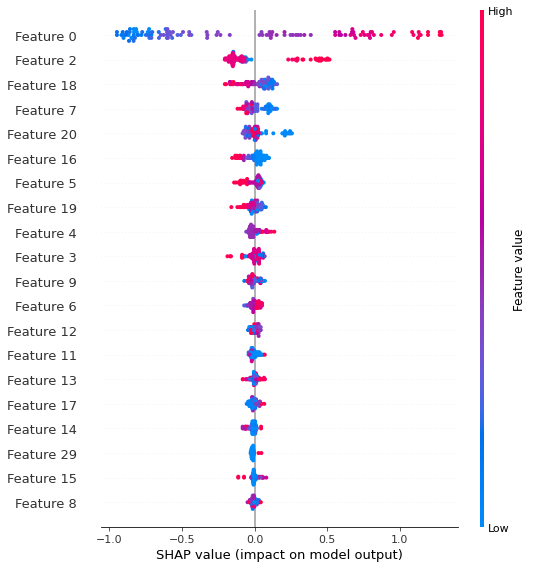

In [14]:
shap.summary_plot(shap_values, df.drop(['target'], axis=1).values, show=None)
plt.savefig('figures/shap_impact_preprocessed.png')

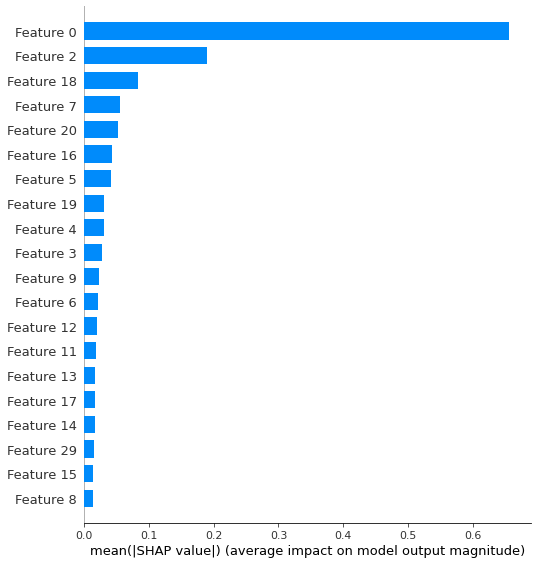

In [15]:
shap.summary_plot(shap_values, df.drop(['target'], axis=1).values, plot_type='bar', show=None)
plt.savefig('figures/shap_contribution_preprocessed.png')